In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}
from utils.myhmm import myHMM, FIGSIZE, MARKER, MARKER_COLOR, CMAP, MARKER_SIZE

In [2]:
ALPHA = 0.1

__Load datasets__

In [3]:
train = pd.read_table("data/EMGaussian.data", sep=" ", header=None)
test = pd.read_table("data/EMGaussian.test", sep=" ", header=None)

n_sample_train, n_feature = train.shape
n_sample_test = test.shape[0]

print "Traning set : ", train.shape
print "Testing set : ", test.shape

train = train.values
test = test.values

Traning set :  (500, 2)
Testing set :  (500, 2)


__Visualization__

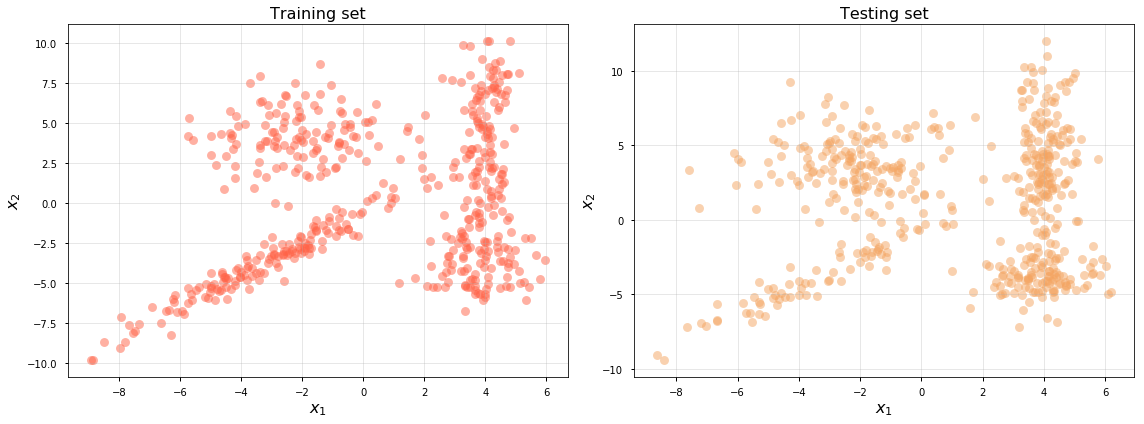

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].scatter(*train.T, color="tomato", **plot_kwds)
ax[0].grid(alpha=0.3)
ax[0].set_xlabel(r"$x_{1}$", size=16)
ax[0].set_ylabel(r"$x_{2}$", size=16)
ax[0].set_title("Training set", size=16)


ax[1].scatter(*test.T, color = "sandybrown", **plot_kwds)
ax[1].grid(alpha=0.3)
ax[1].set_xlabel(r"$x_{1}$", size=16)
ax[1].set_ylabel(r"$x_{2}$", size=16)
ax[1].set_title("Testing set", size=16)

plt.tight_layout()

## EM on HMM

In [5]:
from utils.GaussianMixtureModel import GaussianMixtureModel

In [20]:
hmm = myHMM(k=4, initialization="kmeans")
gmm = GaussianMixtureModel(k=4, initialization="kmeans")

hmm.fit(train)
gmm.fit(train)

In [7]:
labels_viterbi = hmm.viterbi(train)

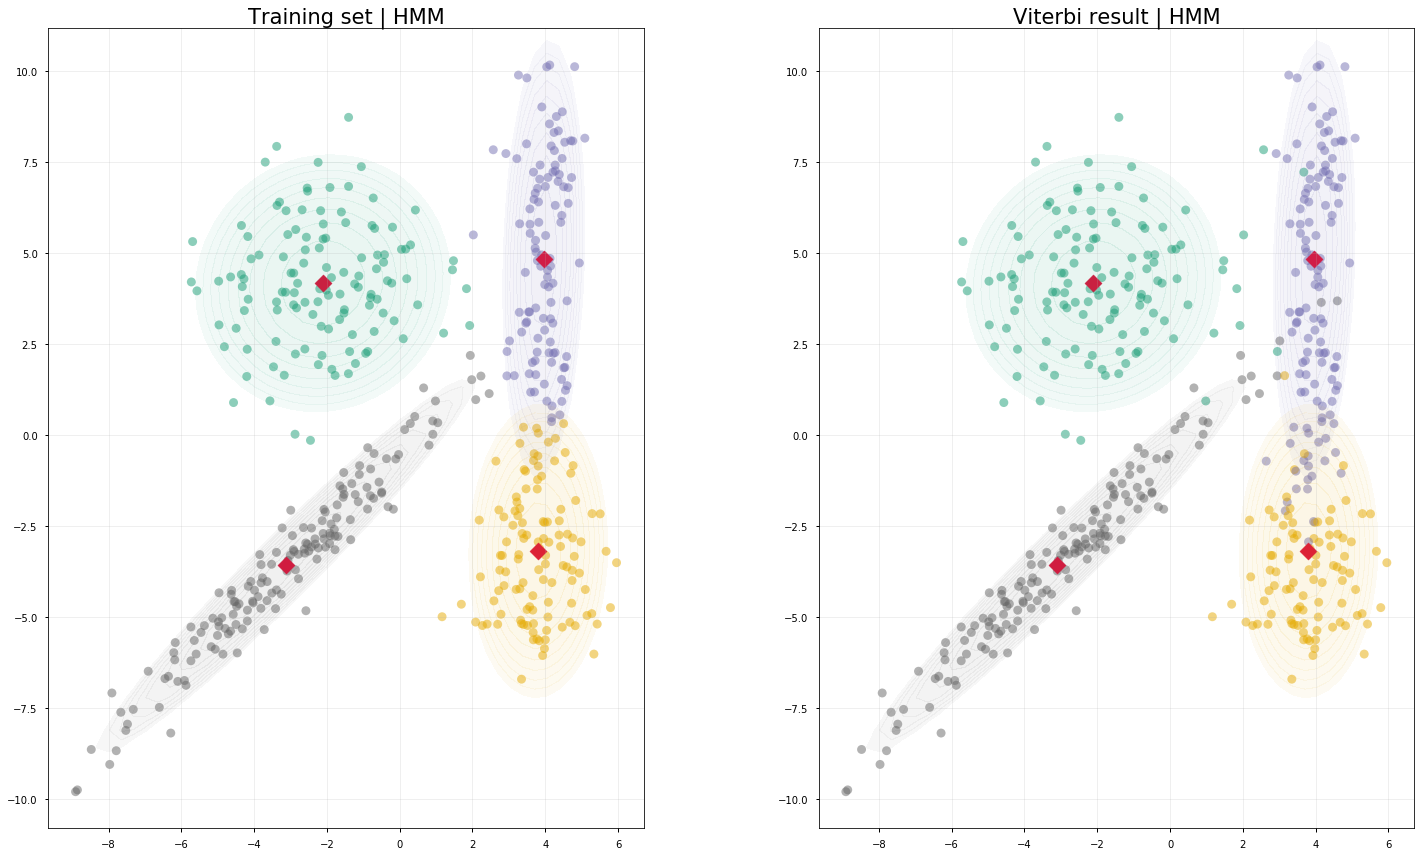

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(22, 12)) 

title = "Training set | HMM"
hmm.plot_pred(X=train,
                 labels=hmm.labels_,
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[0],
                 alpha=ALPHA)
ax[0].set_aspect('equal')

title = "Viterbi result | HMM"
hmm.plot_pred(X=train,
                 labels=labels_viterbi,
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[1],
                 alpha=ALPHA)
ax[1].set_aspect('equal')
plt.tight_layout()

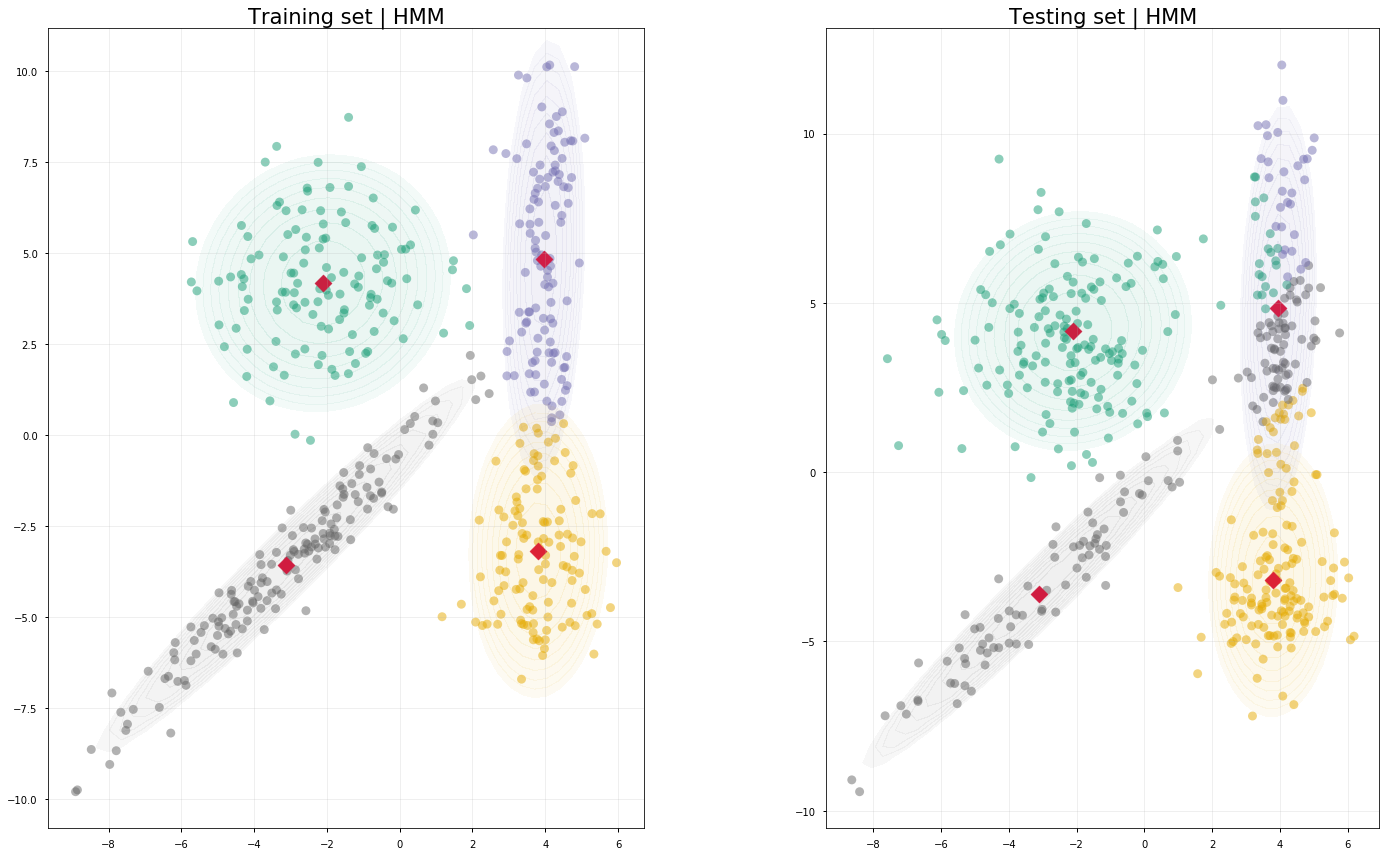

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(22, 12)) 

title = "Training set | HMM"
hmm.plot_pred(X=train,
                 labels=hmm.labels_,
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[0],
                 alpha=ALPHA)
ax[0].set_aspect('equal')

test_labels = hmm.predict(test)
title = "Testing set | HMM"
hmm.plot_pred(X=test,
                 labels=test_labels, 
                 title=title,
                 plot_kwds=plot_kwds,
                 ax=ax[1],
                 alpha=ALPHA)
ax[1].set_aspect('equal')
plt.tight_layout()

In [21]:
# Loglikelihoods
log_likelihoods = {'train':{}, 'test':{}}

log_likelihoods['train']['GMM'] = gmm.compute_expectation_()/len(train)

gmm.compute_estimators_(test)
gmm.compute_multivariate_normal_matrix(test)
log_likelihoods['test']['GMM'] = gmm.compute_expectation_()/len(test)

hmm.compute_messages(train)
log_likelihoods['train']['HMM'] = hmm.compute_expectation_()/len(train)

hmm.compute_multivariate_normal_matrix(test)
hmm.compute_messages(test)
log_likelihoods['test']['HMM'] = hmm.compute_expectation_()/len(test)

df = pd.DataFrame(log_likelihoods)
df = df.round(3)
df.to_latex("docs/tex/log_likelihoods.tex")

In [22]:
log_likelihoods

{'test': {'GMM': -6.9412134098127485, 'HMM': -3.17476229441657},
 'train': {'GMM': -4.848969049044832, 'HMM': -3.2479154310139227}}